The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


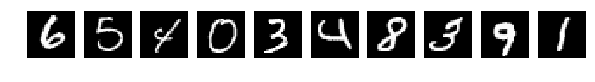


start training
iteration number :  2578
Iter: 0, d_loss : 1.556, g_loss : 1.056
discriminator output real : 0.50, fake : 0.49


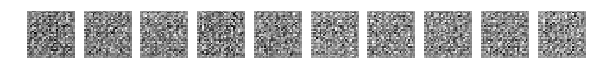

Iter: 250, d_loss : 1.119, g_loss : 1.144
Iter: 500, d_loss : 1.185, g_loss : 1.013
discriminator output real : 0.44, fake : 0.33


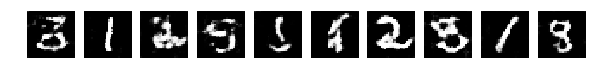

Iter: 750, d_loss : 1.196, g_loss : 0.981
Iter: 1000, d_loss : 1.121, g_loss : 1.073
discriminator output real : 0.65, fake : 0.42


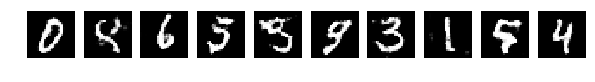

Iter: 1250, d_loss : 1.103, g_loss : 1.082
Iter: 1500, d_loss : 1.164, g_loss : 1.052
discriminator output real : 0.63, fake : 0.47


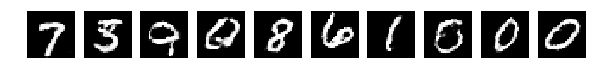

Iter: 1750, d_loss : 1.050, g_loss : 1.109
Iter: 2000, d_loss : 1.085, g_loss : 1.147
discriminator output real : 0.55, fake : 0.34


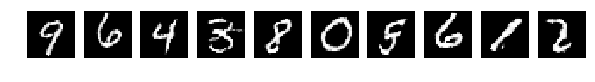

Iter: 2250, d_loss : 1.123, g_loss : 1.129
Iter: 2500, d_loss : 1.079, g_loss : 1.090
discriminator output real : 0.71, fake : 0.52


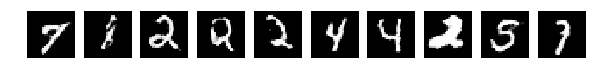

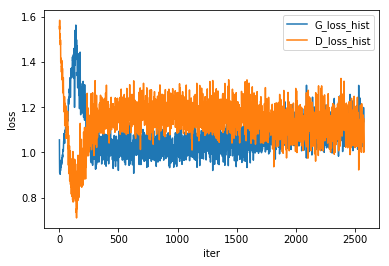

model, configuration saved in file DCGAN

training time : 51.33s


In [12]:
import tensorflow as tf
from network import *
import train
import time

%load_ext autoreload
%autoreload 2

# command center
batch = 64
latent_dim = 96

layers_d = [('conv1', {'n_out': 64, 'k': 4, 's': 2, 'act': lrelu}),
            ('conv2', {'n_out': 128, 'k': 4, 's': 2, 'act': lrelu, 'batch': True}),
            ('fc3', {'reshape': [-1], 'n_out': 1024, 'act': lrelu, 'batch': True}),
            ('fc4', {'n_out': 1, 'act': None})
            ]

layers_g = [('fc1', {'n_out': 1024, 'act': relu, 'batch': True}),
            ('fc2', {'n_out': 7 * 7 * 128, 'act': relu, 'batch': True}),
            ('cnvT3', {'reshape': [7, 7, 128], 'n_out': 64, 'k': 4, 's': 2, 'act': relu, 'batch': True}),
            ('cnvT4', {'n_out': 1, 'k': 4, 's': 2, 'act': tanh})
            ]

gan_type = 'GAN'
loss_lambda = 10.0

optim_d = {'type': 'adam', 'lr': 2e-4, 'beta1': 0.5, 'beta2': 0.999}
optim_g = {'type': 'adam', 'lr': 1e-3, 'beta1': 0.5, 'beta2': 0.999}
lr_decay_epoch = 5

train_config = {'d_per_g': 1, 'num_epoch': 3, 'show_every': 500, 'print_every': 250}
save_file_dir = "DCGAN"

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

### change batch size

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


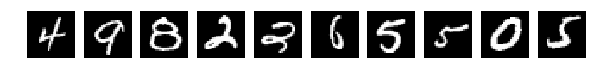


start training
iteration number :  41250
Iter: 0, d_loss : 1.379, g_loss : 1.419
discriminator output real : 0.50, fake : 0.51


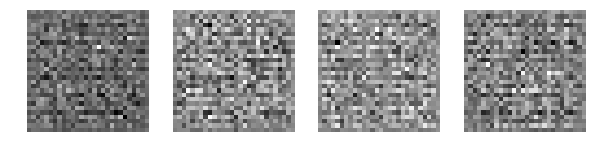

Iter: 1000, d_loss : 1.418, g_loss : 0.754
Iter: 2000, d_loss : 1.395, g_loss : 0.737
discriminator output real : 0.52, fake : 0.25


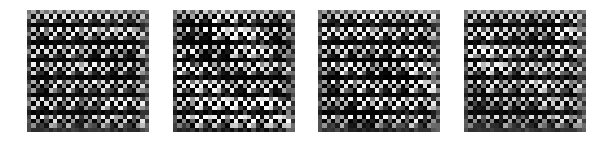

Iter: 3000, d_loss : 1.347, g_loss : 0.758
Iter: 4000, d_loss : 1.364, g_loss : 0.786
discriminator output real : 0.56, fake : 0.38


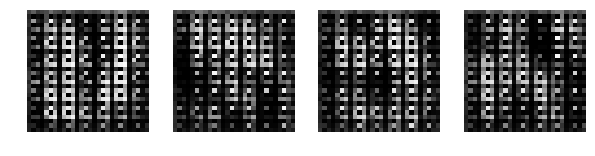

Iter: 5000, d_loss : 1.325, g_loss : 0.790
Iter: 6000, d_loss : 1.417, g_loss : 0.763
discriminator output real : 0.52, fake : 0.44


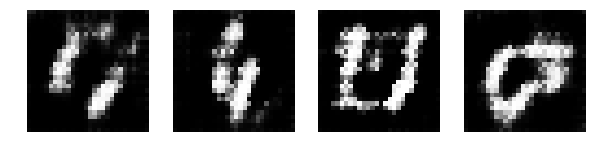

Iter: 7000, d_loss : 1.397, g_loss : 0.746
Iter: 8000, d_loss : 1.364, g_loss : 0.803
discriminator output real : 0.52, fake : 0.42


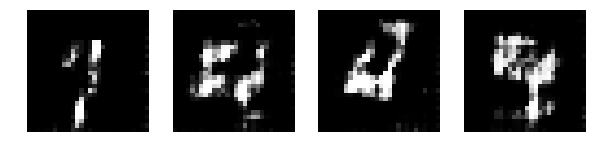

Iter: 9000, d_loss : 1.357, g_loss : 0.760
Iter: 10000, d_loss : 1.346, g_loss : 0.772
discriminator output real : 0.56, fake : 0.47


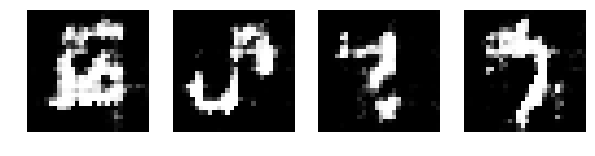

Iter: 11000, d_loss : 1.259, g_loss : 0.878
Iter: 12000, d_loss : 1.442, g_loss : 0.806
discriminator output real : 0.55, fake : 0.48


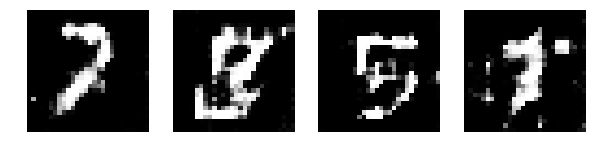

Iter: 13000, d_loss : 1.231, g_loss : 0.840
Iter: 14000, d_loss : 1.362, g_loss : 0.779
discriminator output real : 0.60, fake : 0.50


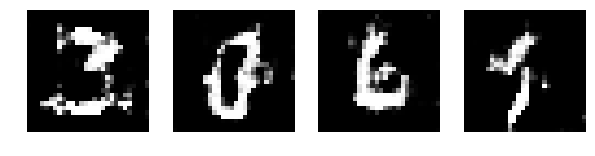

Iter: 15000, d_loss : 1.321, g_loss : 0.834
Iter: 16000, d_loss : 1.322, g_loss : 0.806
discriminator output real : 0.63, fake : 0.44


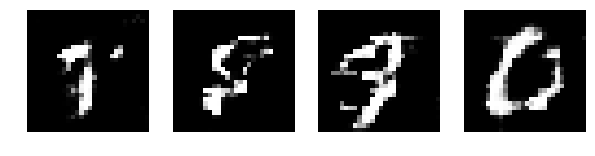

Iter: 17000, d_loss : 1.513, g_loss : 0.798
Iter: 18000, d_loss : 1.253, g_loss : 0.821
discriminator output real : 0.67, fake : 0.39


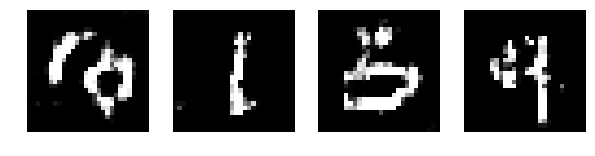

Iter: 19000, d_loss : 1.178, g_loss : 0.875
Iter: 20000, d_loss : 1.343, g_loss : 0.954
discriminator output real : 0.63, fake : 0.47


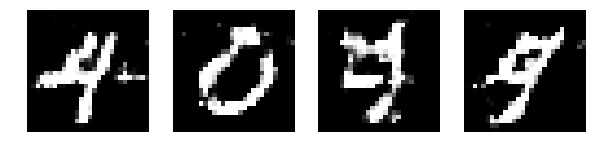

Iter: 21000, d_loss : 1.255, g_loss : 0.897
Iter: 22000, d_loss : 1.338, g_loss : 1.040
discriminator output real : 0.61, fake : 0.42


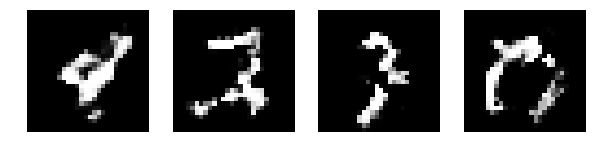

Iter: 23000, d_loss : 1.109, g_loss : 1.037
Iter: 24000, d_loss : 1.168, g_loss : 0.960
discriminator output real : 0.76, fake : 0.49


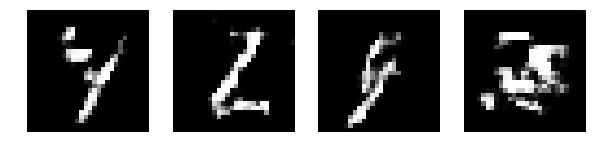

Iter: 25000, d_loss : 1.269, g_loss : 1.028
Iter: 26000, d_loss : 1.016, g_loss : 1.333
discriminator output real : 0.62, fake : 0.23


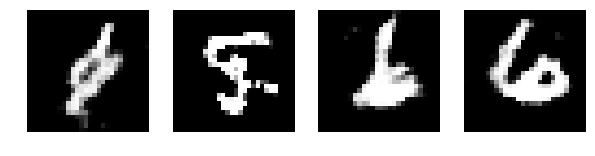

Iter: 27000, d_loss : 0.992, g_loss : 1.135
Iter: 28000, d_loss : 1.306, g_loss : 0.995
discriminator output real : 0.66, fake : 0.47


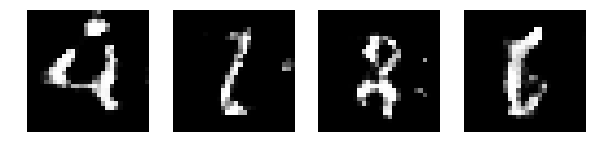

Iter: 29000, d_loss : 1.071, g_loss : 1.203
Iter: 30000, d_loss : 1.113, g_loss : 1.278
discriminator output real : 0.56, fake : 0.39


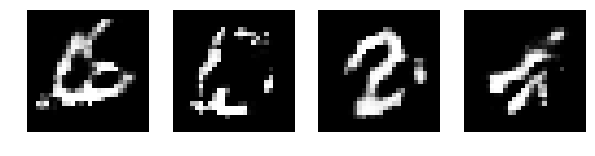

Iter: 31000, d_loss : 1.053, g_loss : 0.903
Iter: 32000, d_loss : 1.179, g_loss : 1.001
discriminator output real : 0.76, fake : 0.46


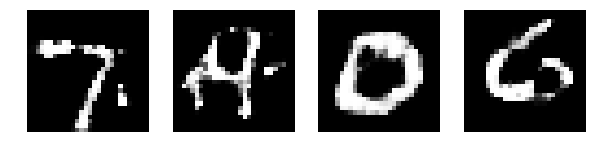

Iter: 33000, d_loss : 1.059, g_loss : 1.182
Iter: 34000, d_loss : 1.301, g_loss : 1.230
discriminator output real : 0.68, fake : 0.46


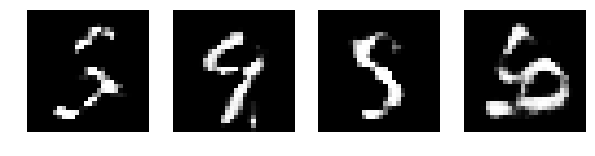

Iter: 35000, d_loss : 0.938, g_loss : 1.254
Iter: 36000, d_loss : 0.752, g_loss : 1.374
discriminator output real : 0.91, fake : 0.40


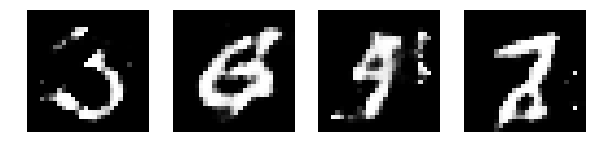

Iter: 37000, d_loss : 0.950, g_loss : 1.297
Iter: 38000, d_loss : 1.099, g_loss : 1.095
discriminator output real : 0.66, fake : 0.52


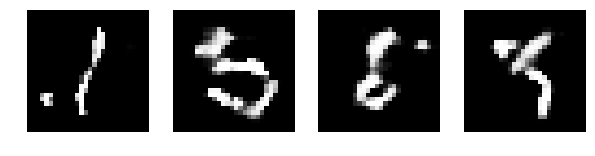

Iter: 39000, d_loss : 1.163, g_loss : 1.223
Iter: 40000, d_loss : 1.006, g_loss : 1.790
discriminator output real : 0.85, fake : 0.59


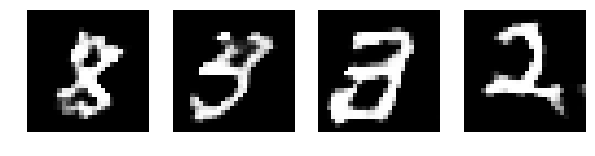

Iter: 41000, d_loss : 0.534, g_loss : 2.275


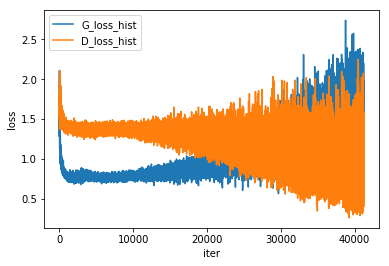

model, configuration saved in file DCGAN

training time : 473.58s


In [10]:
batch = 4
latent_dim = 96

train_config = {'d_per_g': 1, 'num_epoch': 3, 'show_every': 2000, 'print_every': 1000}
save_file_dir = "DCGAN"

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


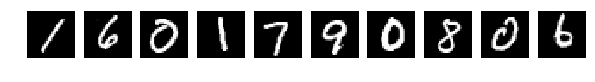


start training
iteration number :  10312
Iter: 0, d_loss : 1.568, g_loss : 1.693
discriminator output real : 0.51, fake : 0.52


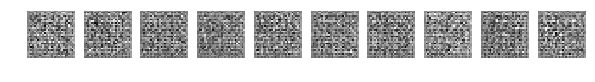

Iter: 1000, d_loss : 1.189, g_loss : 1.001
Iter: 2000, d_loss : 1.244, g_loss : 0.911
discriminator output real : 0.61, fake : 0.42


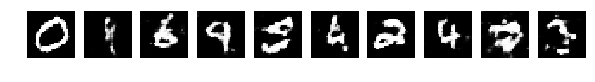

Iter: 3000, d_loss : 1.259, g_loss : 0.949
Iter: 4000, d_loss : 1.243, g_loss : 1.029
discriminator output real : 0.66, fake : 0.51


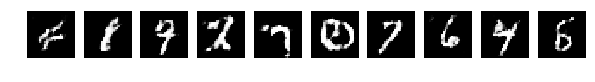

Iter: 5000, d_loss : 1.277, g_loss : 1.004
Iter: 6000, d_loss : 1.221, g_loss : 0.975
discriminator output real : 0.69, fake : 0.52


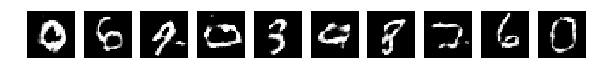

Iter: 7000, d_loss : 0.991, g_loss : 1.141
Iter: 8000, d_loss : 1.052, g_loss : 1.109
discriminator output real : 0.68, fake : 0.52


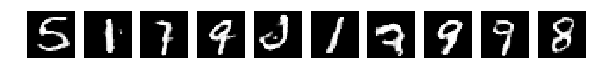

Iter: 9000, d_loss : 1.149, g_loss : 1.165
Iter: 10000, d_loss : 1.043, g_loss : 1.226
discriminator output real : 0.55, fake : 0.42


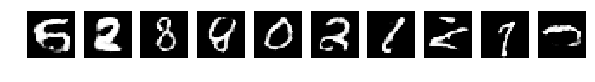

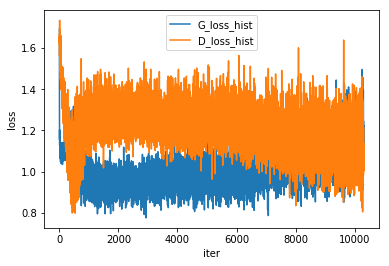

model, configuration saved in file DCGAN

training time : 130.65s


In [11]:
batch = 16
latent_dim = 96

train_config = {'d_per_g': 1, 'num_epoch': 3, 'show_every': 2000, 'print_every': 1000}
save_file_dir = "DCGAN"

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


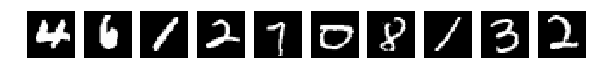


start training
iteration number :  1289
Iter: 0, d_loss : 1.610, g_loss : 1.254
discriminator output real : 0.46, fake : 0.49


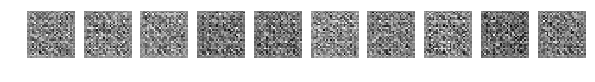

Iter: 125, d_loss : 0.822, g_loss : 1.556
Iter: 250, d_loss : 1.113, g_loss : 1.028
discriminator output real : 0.61, fake : 0.51


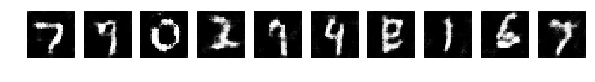

Iter: 375, d_loss : 1.234, g_loss : 0.921
Iter: 500, d_loss : 1.121, g_loss : 0.989
discriminator output real : 0.63, fake : 0.45


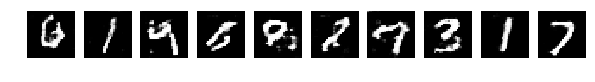

Iter: 625, d_loss : 1.207, g_loss : 0.977
Iter: 750, d_loss : 1.156, g_loss : 0.954
discriminator output real : 0.56, fake : 0.39


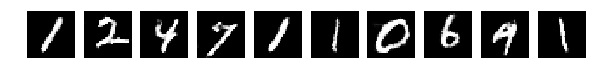

Iter: 875, d_loss : 1.183, g_loss : 0.954
Iter: 1000, d_loss : 1.175, g_loss : 1.076
discriminator output real : 0.55, fake : 0.41


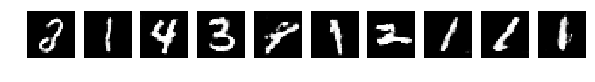

Iter: 1125, d_loss : 1.246, g_loss : 0.990
Iter: 1250, d_loss : 1.315, g_loss : 1.008
discriminator output real : 0.49, fake : 0.40


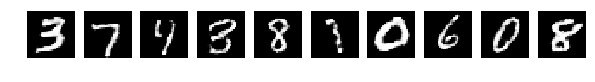

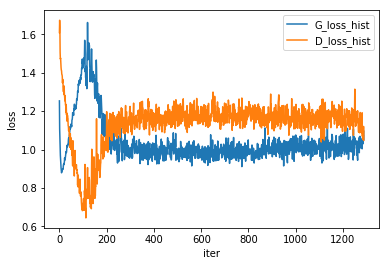

model, configuration saved in file DCGAN

training time : 41.32s


In [13]:
batch = 128
latent_dim = 96

train_config = {'d_per_g': 1, 'num_epoch': 3, 'show_every': 250, 'print_every': 125}
save_file_dir = "DCGAN"

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

### change latent dimension

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


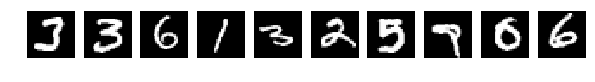


start training
iteration number :  1289
Iter: 0, d_loss : 1.559, g_loss : 0.967
discriminator output real : 0.50, fake : 0.49


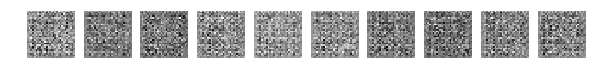

Iter: 125, d_loss : 1.173, g_loss : 1.211
Iter: 250, d_loss : 1.046, g_loss : 0.983
discriminator output real : 0.69, fake : 0.33


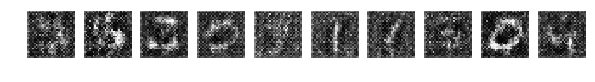

Iter: 375, d_loss : 1.230, g_loss : 0.873
Iter: 500, d_loss : 1.164, g_loss : 0.908
discriminator output real : 0.58, fake : 0.40


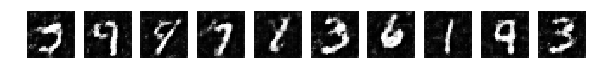

Iter: 625, d_loss : 1.199, g_loss : 0.925
Iter: 750, d_loss : 1.196, g_loss : 0.914
discriminator output real : 0.63, fake : 0.48


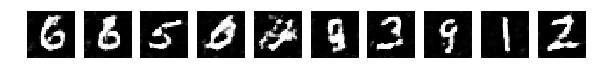

Iter: 875, d_loss : 1.248, g_loss : 0.917
Iter: 1000, d_loss : 1.277, g_loss : 0.902
discriminator output real : 0.50, fake : 0.39


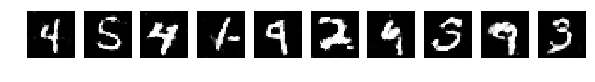

Iter: 1125, d_loss : 1.190, g_loss : 0.936
Iter: 1250, d_loss : 1.205, g_loss : 0.934
discriminator output real : 0.64, fake : 0.49


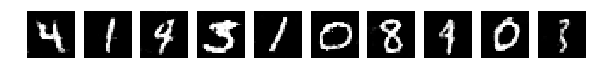

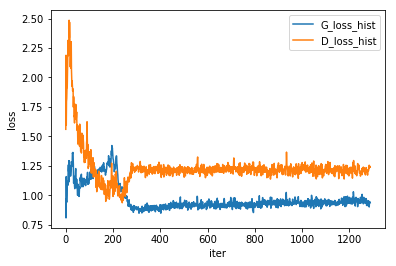

model, configuration saved in file DCGAN

training time : 41.68s


In [14]:
batch = 128
latent_dim = 10

train_config = {'d_per_g': 1, 'num_epoch': 3, 'show_every': 250, 'print_every': 125}
save_file_dir = "DCGAN"

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


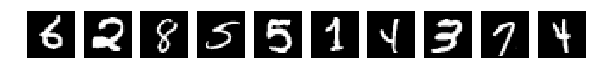


start training
iteration number :  8593
Iter: 0, d_loss : 1.576, g_loss : 1.106
discriminator output real : 0.49, fake : 0.51


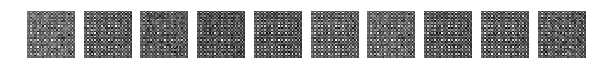

Iter: 125, d_loss : 1.405, g_loss : 1.116
Iter: 250, d_loss : 0.939, g_loss : 1.293
discriminator output real : 0.86, fake : 0.69


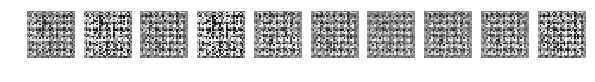

Iter: 375, d_loss : 0.887, g_loss : 1.337
Iter: 500, d_loss : 0.646, g_loss : 1.538
discriminator output real : 0.61, fake : 0.09


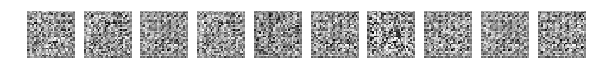

Iter: 625, d_loss : 0.566, g_loss : 1.673
Iter: 750, d_loss : 0.644, g_loss : 1.646
discriminator output real : 0.90, fake : 0.03


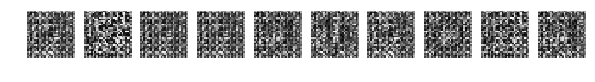

Iter: 875, d_loss : 1.057, g_loss : 1.059
Iter: 1000, d_loss : 1.027, g_loss : 1.122
discriminator output real : 0.65, fake : 0.01


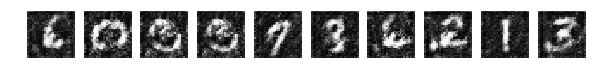

Iter: 1125, d_loss : 0.973, g_loss : 1.157
Iter: 1250, d_loss : 0.903, g_loss : 1.277
discriminator output real : 0.61, fake : 0.02


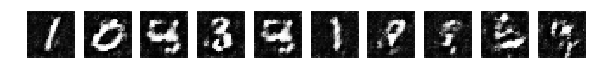

Iter: 1375, d_loss : 0.920, g_loss : 1.215
Iter: 1500, d_loss : 0.895, g_loss : 1.243
discriminator output real : 0.57, fake : 0.19


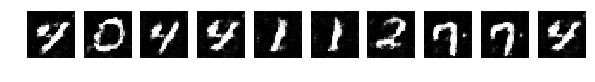

Iter: 1625, d_loss : 0.832, g_loss : 1.325
Iter: 1750, d_loss : 0.897, g_loss : 1.278
discriminator output real : 0.65, fake : 0.38


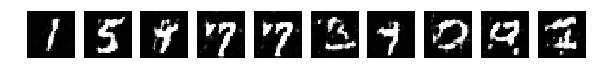

Iter: 1875, d_loss : 0.886, g_loss : 1.340
Iter: 2000, d_loss : 0.850, g_loss : 1.377
discriminator output real : 0.70, fake : 0.37


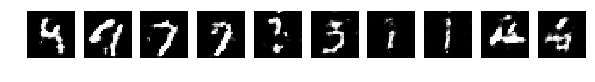

Iter: 2125, d_loss : 0.817, g_loss : 1.420
Iter: 2250, d_loss : 0.759, g_loss : 1.496
discriminator output real : 0.65, fake : 0.33


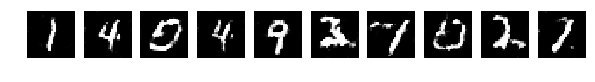

Iter: 2375, d_loss : 0.898, g_loss : 1.433
Iter: 2500, d_loss : 0.760, g_loss : 1.479
discriminator output real : 0.77, fake : 0.43


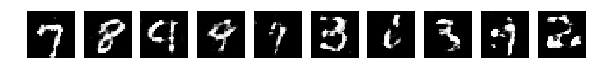

Iter: 2625, d_loss : 0.892, g_loss : 1.458
Iter: 2750, d_loss : 0.815, g_loss : 1.467
discriminator output real : 0.75, fake : 0.45


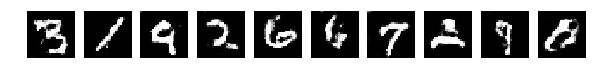

Iter: 2875, d_loss : 0.832, g_loss : 1.375
Iter: 3000, d_loss : 0.782, g_loss : 1.448
discriminator output real : 0.66, fake : 0.25


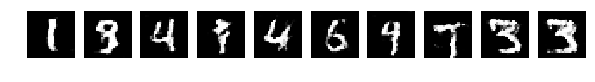

Iter: 3125, d_loss : 0.742, g_loss : 1.527
Iter: 3250, d_loss : 0.881, g_loss : 1.355
discriminator output real : 0.71, fake : 0.44


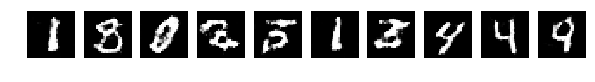

Iter: 3375, d_loss : 0.885, g_loss : 1.443
Iter: 3500, d_loss : 0.924, g_loss : 1.401
discriminator output real : 0.87, fake : 0.61


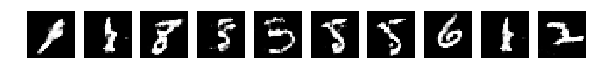

Iter: 3625, d_loss : 0.955, g_loss : 1.405
Iter: 3750, d_loss : 0.735, g_loss : 1.499
discriminator output real : 0.75, fake : 0.43


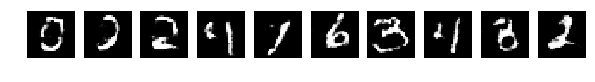

Iter: 3875, d_loss : 0.869, g_loss : 1.373
Iter: 4000, d_loss : 0.809, g_loss : 1.470
discriminator output real : 0.70, fake : 0.35


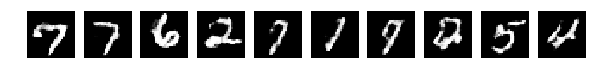

Iter: 4125, d_loss : 0.883, g_loss : 1.638
Iter: 4250, d_loss : 0.912, g_loss : 1.438
discriminator output real : 0.85, fake : 0.48


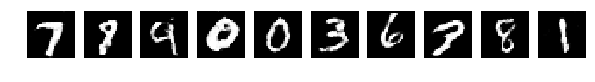

learning rate is decayed d : 5e-05, g : 0.00025
Iter: 4375, d_loss : 0.802, g_loss : 1.494
Iter: 4500, d_loss : 0.741, g_loss : 1.580
discriminator output real : 0.76, fake : 0.34


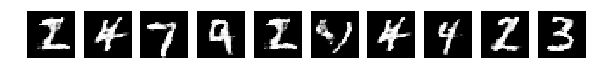

Iter: 4625, d_loss : 0.780, g_loss : 1.517
Iter: 4750, d_loss : 0.775, g_loss : 1.454
discriminator output real : 0.65, fake : 0.28


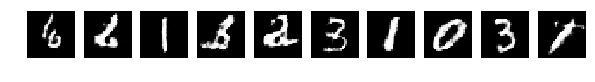

Iter: 4875, d_loss : 0.848, g_loss : 1.483
Iter: 5000, d_loss : 0.847, g_loss : 1.601
discriminator output real : 0.68, fake : 0.34


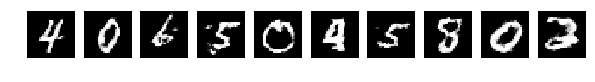

Iter: 5125, d_loss : 0.819, g_loss : 1.515
Iter: 5250, d_loss : 0.821, g_loss : 1.454
discriminator output real : 0.89, fake : 0.63


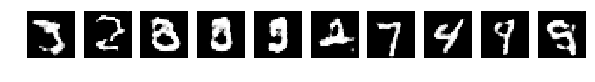

Iter: 5375, d_loss : 0.854, g_loss : 1.422
Iter: 5500, d_loss : 0.783, g_loss : 1.528
discriminator output real : 0.75, fake : 0.37


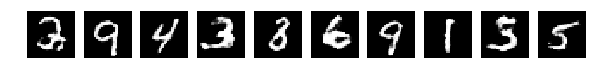

Iter: 5625, d_loss : 0.777, g_loss : 1.573
Iter: 5750, d_loss : 0.771, g_loss : 1.691
discriminator output real : 0.83, fake : 0.47


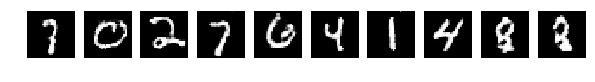

Iter: 5875, d_loss : 0.679, g_loss : 1.646
Iter: 6000, d_loss : 0.714, g_loss : 1.579
discriminator output real : 0.76, fake : 0.39


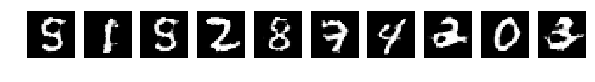

Iter: 6125, d_loss : 0.668, g_loss : 1.739
Iter: 6250, d_loss : 0.708, g_loss : 1.732
discriminator output real : 0.80, fake : 0.43


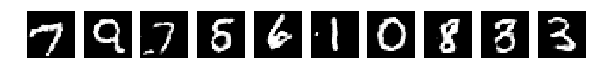

Iter: 6375, d_loss : 0.697, g_loss : 1.707
Iter: 6500, d_loss : 0.702, g_loss : 1.762
discriminator output real : 0.72, fake : 0.37


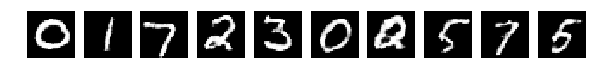

Iter: 6625, d_loss : 0.736, g_loss : 1.544
Iter: 6750, d_loss : 0.743, g_loss : 1.774
discriminator output real : 0.82, fake : 0.49


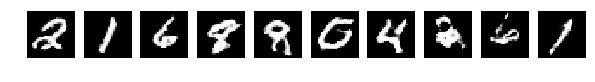

Iter: 6875, d_loss : 0.559, g_loss : 1.789
Iter: 7000, d_loss : 0.602, g_loss : 1.723
discriminator output real : 0.86, fake : 0.49


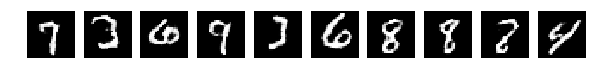

Iter: 7125, d_loss : 0.683, g_loss : 1.881
Iter: 7250, d_loss : 0.755, g_loss : 1.619
discriminator output real : 0.86, fake : 0.49


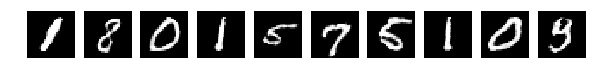

Iter: 7375, d_loss : 0.682, g_loss : 1.818
Iter: 7500, d_loss : 0.770, g_loss : 1.875
discriminator output real : 0.89, fake : 0.50


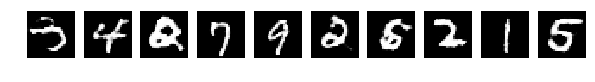

Iter: 7625, d_loss : 0.585, g_loss : 1.939
Iter: 7750, d_loss : 0.619, g_loss : 1.803
discriminator output real : 0.80, fake : 0.42


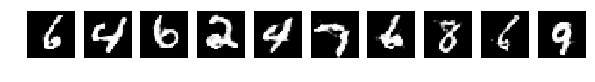

Iter: 7875, d_loss : 0.485, g_loss : 2.160
Iter: 8000, d_loss : 0.629, g_loss : 1.760
discriminator output real : 0.82, fake : 0.43


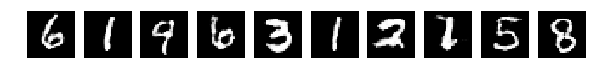

Iter: 8125, d_loss : 0.589, g_loss : 2.023
Iter: 8250, d_loss : 0.560, g_loss : 1.959
discriminator output real : 0.90, fake : 0.47


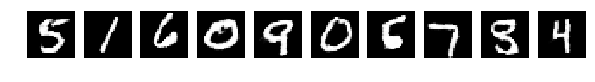

Iter: 8375, d_loss : 0.787, g_loss : 1.693
Iter: 8500, d_loss : 0.560, g_loss : 1.825
discriminator output real : 0.89, fake : 0.49


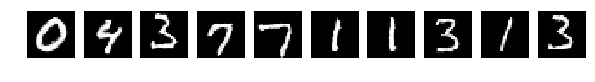

learning rate is decayed d : 2.5e-05, g : 0.000125


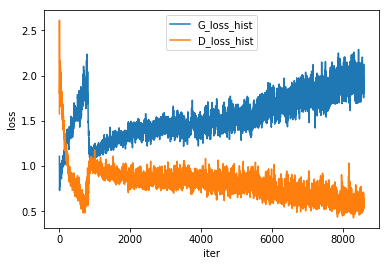

model, configuration saved in file DCGAN

training time : 247.81s


In [19]:
batch = 128
latent_dim = 2

train_config = {'d_per_g': 1, 'num_epoch': 20, 'show_every': 250, 'print_every': 125}
save_file_dir = "DCGAN"
lr_decay_epoch = 10

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

### print test images

INFO:tensorflow:Restoring parameters from DCGAN.ckpt
model is restored !


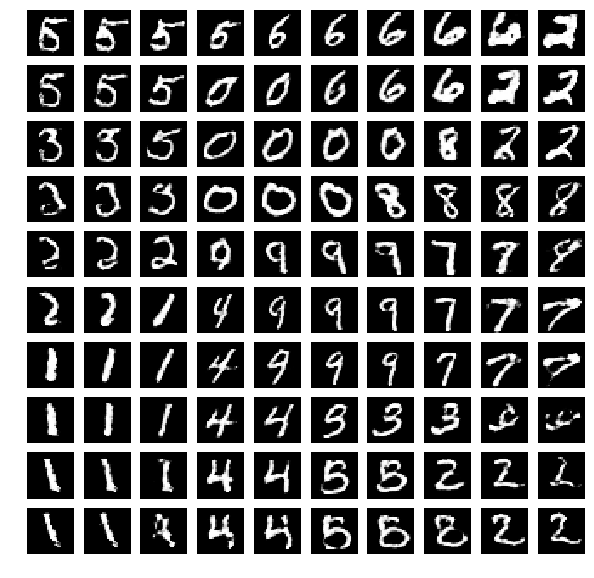

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from data import deprocess

tf.reset_default_graph()

z = tf.placeholder(shape=(10, 2), dtype=tf.float32)
is_training = tf.placeholder(tf.bool)

gen_image,_,_,_ = network("generator", z, layers_g, is_training=is_training)

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "DCGAN.ckpt")
    print("model is restored !")
    plt.figure(figsize = (10,10))
    line_noise = np.linspace(-1,1,10)
    for i in range(10):
        noise = np.zeros((10,2))
        noise[:,0] = line_noise[9-i]
        noise[:,1] = line_noise
        images = sess.run(gen_image, feed_dict = {z: noise, is_training: False})
        for j in range(10):
            plt.subplot(10,10,10*i+j+1)
            plt.imshow(deprocess(images[j]).reshape(28,28))
            plt.axis('off')
    plt.show()

In [13]:
with open(save_file+'.pickle', 'rb') as f:
    dic = pickle.load(f)
    print(dic)

{'g_optim': 'adam', 'layers_g': [('fc1', {'act': <function relu at 0x7f084ccdc6a8>, 'n_out': 1024, 'batch': True}), ('fc2', {'act': <function relu at 0x7f084ccdc6a8>, 'n_out': 6272, 'batch': True}), ('cnvT3', {'act': <function relu at 0x7f084ccdc6a8>, 'n_out': 64, 'batch': True, 'k': 4, 's': 2, 'reshape': [7, 7, 128]}), ('cnvT4', {'act': <function tanh at 0x7f084ccdc840>, 'n_out': 1, 's': 2, 'k': 4})], 'batch': 64, 'layers_d': [('conv1', {'act': <function lrelu at 0x7f084ccdc620>, 'n_out': 64, 's': 2, 'k': 4}), ('conv2', {'act': <function lrelu at 0x7f084ccdc620>, 'n_out': 128, 's': 2, 'batch': True, 'k': 4}), ('fc3', {'act': <function lrelu at 0x7f084ccdc620>, 'n_out': 1024, 'reshape': [-1], 'batch': True}), ('fc4', {'act': None, 'n_out': 1})], 'lr_d_init': 0.0002, 'latent_dim': 96, 'lr_g_init': 0.001, 'd_per_g': 1, 'd_optim': 'adam', 'loss_type': 'lsGAN', 'num_epoch': 1}


### change discriminator

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


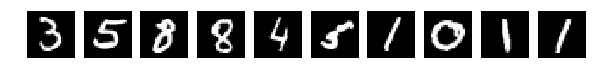


start training
iteration number :  4296
Iter: 0, d_loss : 1.663, g_loss : 0.427
discriminator output real : 0.53, fake : 0.51


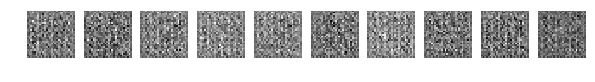

Iter: 250, d_loss : 1.385, g_loss : 0.589
Iter: 500, d_loss : 1.232, g_loss : 0.787
discriminator output real : 0.57, fake : 0.09


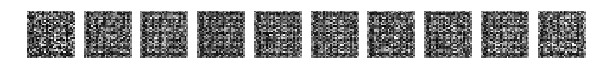

Iter: 750, d_loss : 1.200, g_loss : 0.862
Iter: 1000, d_loss : 1.252, g_loss : 0.848
discriminator output real : 0.55, fake : 0.01


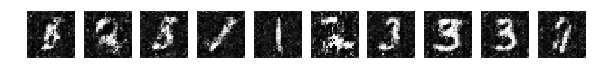

Iter: 1250, d_loss : 1.254, g_loss : 0.806
Iter: 1500, d_loss : 1.260, g_loss : 0.826
discriminator output real : 0.55, fake : 0.33


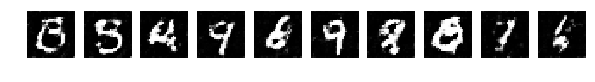

Iter: 1750, d_loss : 1.279, g_loss : 0.818
Iter: 2000, d_loss : 1.260, g_loss : 0.832
discriminator output real : 0.40, fake : 0.39


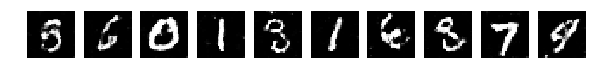

learning rate is decayed d : 5e-05, g : 0.00025
Iter: 2250, d_loss : 1.237, g_loss : 0.831
Iter: 2500, d_loss : 1.259, g_loss : 0.850
discriminator output real : 0.49, fake : 0.39


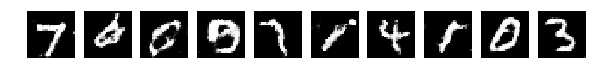

Iter: 2750, d_loss : 1.254, g_loss : 0.838
Iter: 3000, d_loss : 1.264, g_loss : 0.837
discriminator output real : 0.54, fake : 0.45


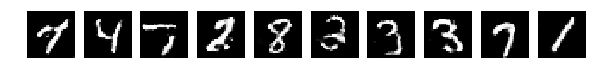

Iter: 3250, d_loss : 1.265, g_loss : 0.816
Iter: 3500, d_loss : 1.262, g_loss : 0.844
discriminator output real : 0.55, fake : 0.46


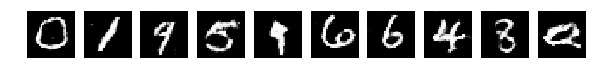

Iter: 3750, d_loss : 1.293, g_loss : 0.855
Iter: 4000, d_loss : 1.257, g_loss : 0.823
discriminator output real : 0.50, fake : 0.42


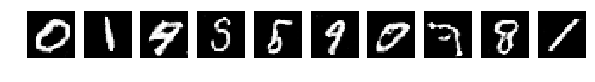

Iter: 4250, d_loss : 1.281, g_loss : 0.807


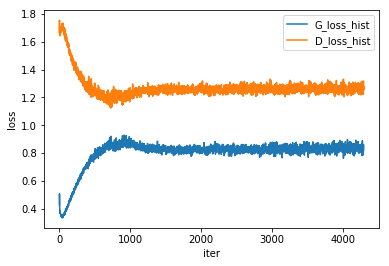

model, configuration saved in file DCGAN

training time : 109.44s


In [8]:
batch = 128
latent_dim = 10

layers_d = [('conv1', {'n_out': 64, 'k': 4, 's': 2, 'act': lrelu}),
            ('conv2', {'n_out': 128, 'k': 4, 's': 2, 'act': lrelu, 'batch': True}),
            ('fc3', {'n_out': 100, 'act': lrelu, 'batch': True, 'reshape': [-1]}),
            ('fc4', {'n_out': 1, 'act': None})
            ]

            
tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


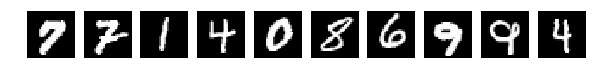


start training
iteration number :  4296
Iter: 0, d_loss : 1.563, g_loss : 0.829
discriminator output real : 0.50, fake : 0.51


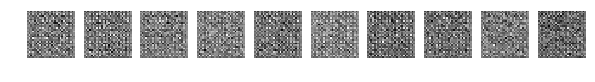

Iter: 250, d_loss : 1.422, g_loss : 0.663
Iter: 500, d_loss : 1.371, g_loss : 0.718
discriminator output real : 0.54, fake : 0.21


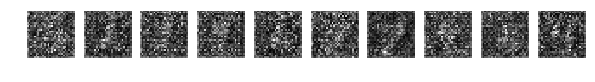

Iter: 750, d_loss : 1.359, g_loss : 0.717
Iter: 1000, d_loss : 1.301, g_loss : 0.786
discriminator output real : 0.52, fake : 0.00


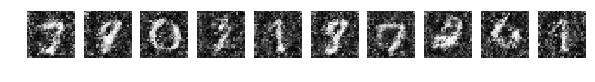

Iter: 1250, d_loss : 1.241, g_loss : 0.813
Iter: 1500, d_loss : 1.267, g_loss : 0.786
discriminator output real : 0.51, fake : 0.08


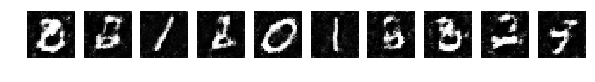

Iter: 1750, d_loss : 1.303, g_loss : 0.804
Iter: 2000, d_loss : 1.291, g_loss : 0.782
discriminator output real : 0.53, fake : 0.47


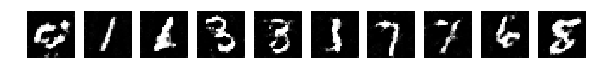

learning rate is decayed d : 2.5e-05, g : 0.000125
Iter: 2250, d_loss : 1.297, g_loss : 0.787
Iter: 2500, d_loss : 1.257, g_loss : 0.818
discriminator output real : 0.55, fake : 0.48


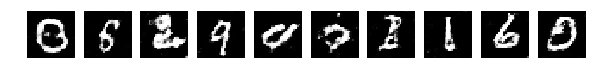

Iter: 2750, d_loss : 1.289, g_loss : 0.787
Iter: 3000, d_loss : 1.290, g_loss : 0.786
discriminator output real : 0.51, fake : 0.48


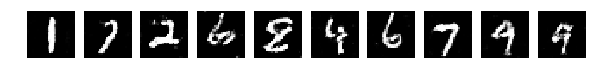

Iter: 3250, d_loss : 1.313, g_loss : 0.789
Iter: 3500, d_loss : 1.301, g_loss : 0.769
discriminator output real : 0.53, fake : 0.48


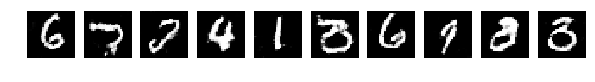

Iter: 3750, d_loss : 1.302, g_loss : 0.789
Iter: 4000, d_loss : 1.283, g_loss : 0.842
discriminator output real : 0.54, fake : 0.50


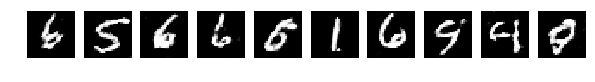

Iter: 4250, d_loss : 1.323, g_loss : 0.777


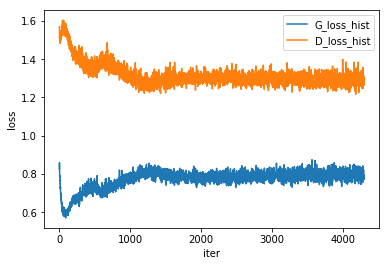

model, configuration saved in file DCGAN

training time : 116.84s


In [9]:
batch = 128
latent_dim = 10

layers_d = [('conv1', {'n_out': 64, 'k': 4, 's': 2, 'act': lrelu}),
            ('conv2', {'n_out': 128, 'k': 4, 's': 2, 'act': lrelu, 'batch': True}),
            ('fc3', {'n_out': 100, 'act': lrelu, 'batch': True, 'reshape': [-1]}),
            ('fc4', {'n_out': 100, 'act': lrelu, 'batch': True}),
            ('fc5', {'n_out': 1, 'act': None})
            ]
            
tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


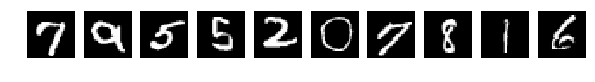


start training
iteration number :  4296
Iter: 0, d_loss : 1.889, g_loss : 0.359
discriminator output real : 0.53, fake : 0.50


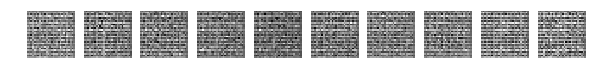

Iter: 250, d_loss : 1.043, g_loss : 1.161
Iter: 500, d_loss : 1.356, g_loss : 0.764
discriminator output real : 0.50, fake : 0.25


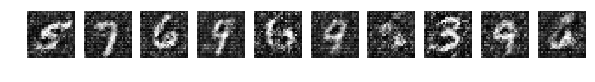

Iter: 750, d_loss : 1.280, g_loss : 0.803
Iter: 1000, d_loss : 1.253, g_loss : 0.849
discriminator output real : 0.59, fake : 0.47


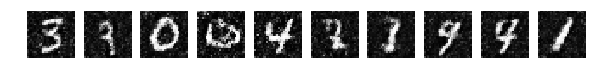

Iter: 1250, d_loss : 1.289, g_loss : 0.816
Iter: 1500, d_loss : 1.259, g_loss : 0.846
discriminator output real : 0.51, fake : 0.43


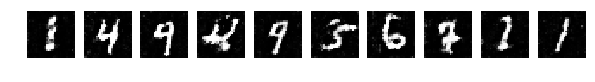

Iter: 1750, d_loss : 1.251, g_loss : 0.839
Iter: 2000, d_loss : 1.258, g_loss : 0.841
discriminator output real : 0.51, fake : 0.40


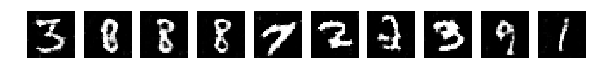

learning rate is decayed d : 0.0001, g : 0.0005
Iter: 2250, d_loss : 1.259, g_loss : 0.853
Iter: 2500, d_loss : 1.293, g_loss : 0.855
discriminator output real : 0.58, fake : 0.49


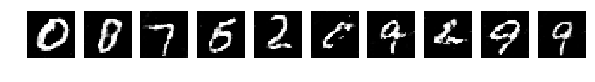

Iter: 2750, d_loss : 1.238, g_loss : 0.887
Iter: 3000, d_loss : 1.286, g_loss : 0.846
discriminator output real : 0.60, fake : 0.48


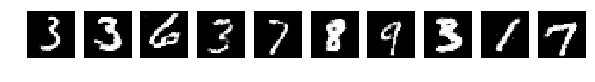

Iter: 3250, d_loss : 1.261, g_loss : 0.870
Iter: 3500, d_loss : 1.267, g_loss : 0.900
discriminator output real : 0.48, fake : 0.38


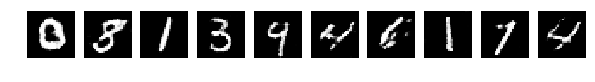

Iter: 3750, d_loss : 1.212, g_loss : 0.907
Iter: 4000, d_loss : 1.258, g_loss : 0.884
discriminator output real : 0.63, fake : 0.50


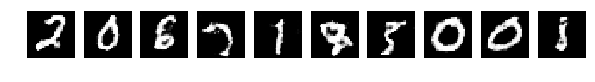

Iter: 4250, d_loss : 1.211, g_loss : 0.900


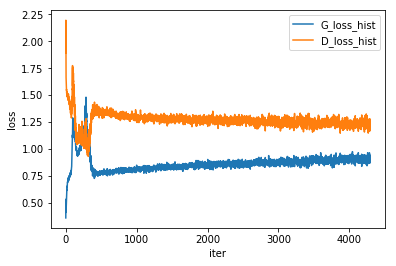

model, configuration saved in file DCGAN

training time : 80.97s


In [18]:
# command center
batch = 128
latent_dim = 10

layers_d = [('conv1', {'n_out': 16, 'k': 4, 's': 2, 'act': lrelu}),
            ('conv2', {'n_out': 32, 'k': 4, 's': 2, 'act': lrelu, 'batch': True}),
            ('fc3', {'n_out': 1024, 'act': lrelu, 'batch': True, 'reshape': [-1]}),
            ('fc4', {'n_out': 1, 'act': None})
            ]


tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

### change d_per_g

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


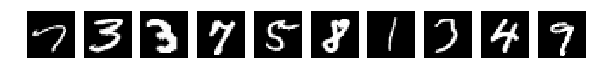


start training
iteration number :  4296
Iter: 0, d_loss : 1.170, g_loss : 0.879
discriminator output real : 0.51, fake : 0.47


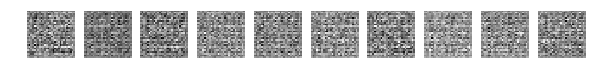

Iter: 250, d_loss : 0.874, g_loss : 1.164
Iter: 500, d_loss : 0.798, g_loss : 1.291
discriminator output real : 0.63, fake : 0.31


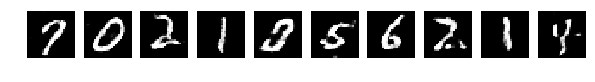

Iter: 750, d_loss : 0.703, g_loss : 1.439
Iter: 1000, d_loss : 0.579, g_loss : 1.676
discriminator output real : 0.78, fake : 0.57


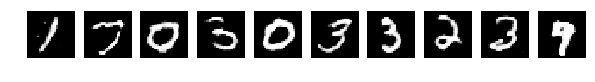

Iter: 1250, d_loss : 0.488, g_loss : 1.782
Iter: 1500, d_loss : 0.459, g_loss : 1.924
discriminator output real : 0.54, fake : 0.20


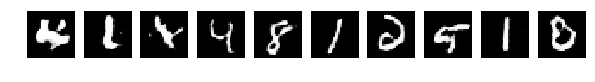

Iter: 1750, d_loss : 0.381, g_loss : 2.145
Iter: 2000, d_loss : 0.305, g_loss : 2.408
discriminator output real : 0.66, fake : 0.32


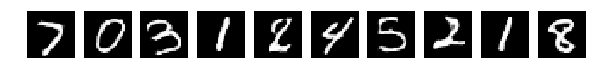

learning rate is decayed d : 0.0001, g : 0.0005
Iter: 2250, d_loss : 0.261, g_loss : 2.299
Iter: 2500, d_loss : 0.449, g_loss : 2.025
discriminator output real : 0.92, fake : 0.62


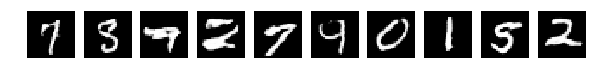

Iter: 2750, d_loss : 0.172, g_loss : 2.782
Iter: 3000, d_loss : 0.336, g_loss : 3.310
discriminator output real : 0.78, fake : 0.47


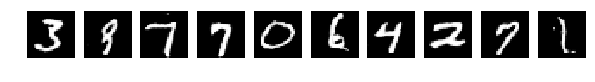

Iter: 3250, d_loss : 0.139, g_loss : 3.163
Iter: 3500, d_loss : 0.116, g_loss : 3.483
discriminator output real : 0.99, fake : 0.84


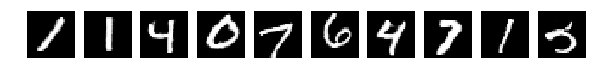

Iter: 3750, d_loss : 0.118, g_loss : 3.505
Iter: 4000, d_loss : 0.113, g_loss : 3.557
discriminator output real : 0.99, fake : 0.93


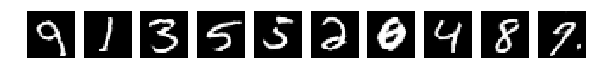

Iter: 4250, d_loss : 0.220, g_loss : 3.850


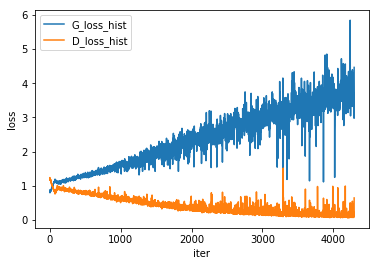

model, configuration saved in file DCGAN

training time : 205.50s


In [19]:
# command center
batch = 128
latent_dim = 10

layers_d = [('conv1', {'n_out': 64, 'k': 4, 's': 2, 'act': lrelu}),
            ('conv2', {'n_out': 128, 'k': 4, 's': 2, 'act': lrelu, 'batch': True}),
            ('fc3', {'n_out': 100, 'act': lrelu, 'batch': True, 'reshape': [-1]}),                # 100 ! 
            ('fc4', {'n_out': 1, 'act': None})
            ]

train_config = {'d_per_g': 3, 'num_epoch': 10, 'show_every': 500, 'print_every': 250}
save_file_dir = "DCGAN"

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

### change generator

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
mnist shape :  (784,)
mnist range :  0.0 to 1.0


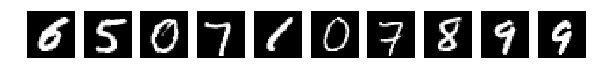


start training
iteration number :  4296
Iter: 0, d_loss : 1.582, g_loss : 1.048
discriminator output real : 0.50, fake : 0.51


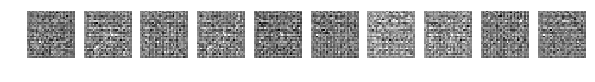

Iter: 250, d_loss : 0.491, g_loss : 2.355
Iter: 500, d_loss : 0.141, g_loss : 2.109
discriminator output real : 0.99, fake : 0.99


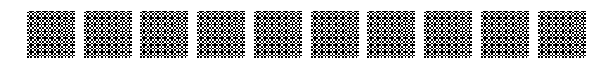

Iter: 750, d_loss : 0.060, g_loss : 3.192
Iter: 1000, d_loss : 0.026, g_loss : 3.837
discriminator output real : 1.00, fake : 0.01


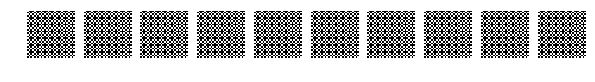

KeyboardInterrupt: 

In [22]:
batch = 128
latent_dim = 10

layers_d = [('conv1', {'n_out': 64, 'k': 4, 's': 2, 'act': lrelu}),
            ('conv2', {'n_out': 128, 'k': 4, 's': 2, 'act': lrelu, 'batch': True}),
            ('fc3', {'n_out': 1024, 'act': lrelu, 'batch': True, 'reshape': [-1]}),
            ('fc4', {'n_out': 1, 'act': None})
            ]

layers_g = [('fc1', {'n_out': 10, 'act': relu, 'batch': True}),
            ('fc2', {'n_out': 7 * 7 * 10, 'act': relu, 'batch': True}),
            ('cnvT3', {'n_out': 64, 'k': 4, 's': 2, 'act': relu, 'batch': True, 'reshape': [7, 7, 10]}),
            ('cnvT4', {'n_out': 1, 'k': 4, 's': 2, 'act': tanh})
            ]

gan_type = 'GAN'
loss_lambda = 10.0

optim_d = {'type': 'adam', 'lr': 2e-4, 'beta1': 0.5, 'beta2': 0.999}
optim_g = {'type': 'adam', 'lr': 1e-3, 'beta1': 0.5, 'beta2': 0.999}
lr_decay_epoch = 5

train_config = {'d_per_g': 1, 'num_epoch': 10, 'show_every': 500, 'print_every': 250}
save_file_dir = "DCGAN"

tic = time.time()
tf.reset_default_graph()
train.train_mnist(batch, latent_dim, layers_d, layers_g, gan_type, optim_d, optim_g, lr_decay_epoch, train_config, save_file_dir,
                  loss_lambda = loss_lambda, device = "/gpu:1")
toc = time.time()
print("\ntraining time : %0.2fs"%(toc-tic))

### summary

- large batch size quality up and fast
- not need large latent dim (but 1 cannot be trained, 2 is hard to train)
- coaser discriminator network (less neurons) works bad.
- however coaser generator is okay (but too small do not work at all)
- more d_per_g makes better output